# Result analysis for experiments on comparision of different cache replacement policies using Gem5 simulator
Course: CSC-725 Operating Systems & Computer Architecture  
Team members: Anish Ghimire & Pramesh Baral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_df = pd.read_csv('sim-out-2023-11-26-23-27-16/output.csv')

In [3]:
results_df.head()

,Experiment,Algorithm,Benchmark,hostSeconds,hostTickRate,hostMemory,simInsts,hostInstRate,hostOpRate,dcache_overallHits,...,l3cache_avgMissLatency,l2cache_tagsInUse,l3cache_tagsInUse,l2cache_avgOccupancy,l3cache_avgOccupancy,memctrl_totalEnergy,memctrl_averagePower,memctrl_readReqs,memctrl_writeReqs,memctrl_readBursts
0,1,RandomRP,queens,195.87,1892082439,703024,115020716,587227,1189764,35313881,...,99010.848756,2996.147012,3050.047101,0.731481,0.372320,172469810715,465.375384,3134,0,3134
1,2,RandomRP,sha,22.97,1567222568,700964,12043629,524265,680576,2429747,...,98949.152542,2907.612673,2950.752164,0.709866,0.360199,16824085830,467.305628,3245,0,3245
2,3,RandomRP,BFS,42.93,1895620933,752592,22031780,513221,987425,5473199,...,101236.016837,4062.774116,7946.715005,0.991888,0.970058,41699459160,512.430794,79113,32137,79113
3,4,RandomRP,blocked-matmul,18.09,2136378834,699948,10074290,556904,969302,3095361,...,102044.233441,3635.860490,4000.123635,0.887661,0.488296,18238869195,471.944185,4318,0,4318
4,5,LRURP,queens,221.96,1669678638,703024,115020716,518201,1049913,35313881,...,99010.848756,2996.147012,3050.047101,0.731481,0.372320,172469810715,465.375384,3134,0,3134


In [4]:
results_df.columns

Index(['Experiment', 'Algorithm', 'Benchmark', 'hostSeconds', 'hostTickRate',
       'hostMemory', 'simInsts', 'hostInstRate', 'hostOpRate',
       'dcache_overallHits', 'dcache_overallMisses', 'dcache_overallAccesses',
       'dcache_avgMissLatency', 'dcache_tagsInUse', 'dcache_avgOccupancy',
       'icache_overallHits', 'icache_overallMisses', 'icache_overallAccesses',
       'icache_avgMissLatency', 'icache_tagsInUse', 'icache_avgOccupancy',
       'l2cache_avgMissLatency', 'l3cache_avgMissLatency', 'l2cache_tagsInUse',
       'l3cache_tagsInUse', 'l2cache_avgOccupancy', 'l3cache_avgOccupancy',
       'memctrl_totalEnergy', 'memctrl_averagePower', 'memctrl_readReqs',
       'memctrl_writeReqs', 'memctrl_readBursts'],
      dtype='object')

In [5]:
results_df['dcache_hitrate'] = results_df['dcache_overallHits'] / results_df['dcache_overallAccesses']
results_df['icache_hitrate'] = results_df['icache_overallHits'] / results_df['icache_overallAccesses']
results_df['total_hitrate'] = sum(results_df['dcache_overallHits'], results_df['icache_overallHits']) / sum(results_df['dcache_overallAccesses'], results_df['icache_overallAccesses'])

In [6]:
results_df['dcache_missrate'] = results_df['dcache_overallMisses'] / results_df['dcache_overallAccesses']
results_df['icache_missrate'] = results_df['icache_overallMisses'] / results_df['icache_overallAccesses']
results_df['total_missrate'] = sum(results_df['dcache_overallMisses'], results_df['icache_overallMisses']) / sum(results_df['dcache_overallAccesses'], results_df['icache_overallAccesses'])

In [7]:
results_bfs = results_df[results_df['Benchmark'] == 'BFS']
results_bfs

,Experiment,Algorithm,Benchmark,hostSeconds,hostTickRate,hostMemory,simInsts,hostInstRate,hostOpRate,dcache_overallHits,...,memctrl_averagePower,memctrl_readReqs,memctrl_writeReqs,memctrl_readBursts,dcache_hitrate,icache_hitrate,total_hitrate,dcache_missrate,icache_missrate,total_missrate
2,3,RandomRP,BFS,42.93,1895620933,752592,22031780,513221,987425,5473199,...,512.430794,79113,32137,79113,0.974909,0.999886,0.996897,0.025091,0.000114,0.003103
6,7,LRURP,BFS,39.55,2057672286,752592,22031780,557092,1071831,5473199,...,512.430794,79113,32137,79113,0.974909,0.999886,0.996897,0.025091,0.000114,0.003103
10,11,MRURP,BFS,37.34,2179294144,752592,22031780,590021,1135185,5473199,...,512.430794,79113,32137,79113,0.974909,0.999886,0.996897,0.025091,0.000114,0.003103
14,15,LFURP,BFS,38.84,2095374848,752588,22031780,567302,1091475,5473199,...,512.430794,79113,32137,79113,0.974909,0.999886,0.996897,0.025091,0.000114,0.003103
18,19,FIFORP,BFS,37.30,2181796485,752592,22031780,590700,1136491,5473199,...,512.430794,79113,32137,79113,0.974909,0.999886,0.996897,0.025091,0.000114,0.003103
22,23,NRURP,BFS,37.78,2153777405,752592,22031780,583115,1121897,5473199,...,512.430794,79113,32137,79113,0.974909,0.999886,0.996897,0.025091,0.000114,0.003103
26,27,TreePLRURP,BFS,36.79,2211621818,752592,22031780,598774,1152026,5473199,...,512.430794,79113,32137,79113,0.974909,0.999886,0.996897,0.025091,0.000114,0.003103
30,31,BIPRP,BFS,36.82,2210146690,752592,22031780,598376,1151260,5473199,...,512.430794,79113,32137,79113,0.974909,0.999886,0.996897,0.025091,0.000114,0.003103
34,35,SecondChanceRP,BFS,37.32,2180619452,752588,22031780,590378,1135872,5473199,...,512.430794,79113,32137,79113,0.974909,0.999886,0.996897,0.025091,0.000114,0.003103
38,39,RRIPRP,BFS,35.80,2272932364,752588,22031780,615375,1183965,5473199,...,512.430794,79113,32137,79113,0.974909,0.999886,0.996897,0.025091,0.000114,0.003103


In [8]:
results_queens = results_df[results_df['Benchmark'] == 'queens']
results_queens

,Experiment,Algorithm,Benchmark,hostSeconds,hostTickRate,hostMemory,simInsts,hostInstRate,hostOpRate,dcache_overallHits,...,memctrl_averagePower,memctrl_readReqs,memctrl_writeReqs,memctrl_readBursts,dcache_hitrate,icache_hitrate,total_hitrate,dcache_missrate,icache_missrate,total_missrate
0,1,RandomRP,queens,195.87,1892082439,703024,115020716,587227,1189764,35313881,...,465.375384,3134,0,3134,0.999944,0.99999,0.997472,0.000056,0.00001,0.002528
4,5,LRURP,queens,221.96,1669678638,703024,115020716,518201,1049913,35313881,...,465.375384,3134,0,3134,0.999944,0.99999,0.997472,0.000056,0.00001,0.002528
8,9,MRURP,queens,203.84,1818106701,703020,115020716,564268,1143248,35313881,...,465.375384,3134,0,3134,0.999944,0.99999,0.997472,0.000056,0.00001,0.002528
12,13,LFURP,queens,191.15,1938826747,703024,115020716,601735,1219158,35313881,...,465.375384,3134,0,3134,0.999944,0.99999,0.997472,0.000056,0.00001,0.002528
16,17,FIFORP,queens,187.93,1972067981,703024,115020716,612051,1240060,35313881,...,465.375384,3134,0,3134,0.999944,0.99999,0.997472,0.000056,0.00001,0.002528
20,21,NRURP,queens,183.29,2021995549,703024,115020716,627547,1271456,35313881,...,465.375384,3134,0,3134,0.999944,0.99999,0.997472,0.000056,0.00001,0.002528
24,25,TreePLRURP,queens,185.98,1992666153,703020,115020716,618444,1253013,35313881,...,465.375384,3134,0,3134,0.999944,0.99999,0.997472,0.000056,0.00001,0.002528
28,29,BIPRP,queens,182.68,2028732845,703020,115020716,629638,1275692,35313881,...,465.375384,3134,0,3134,0.999944,0.99999,0.997472,0.000056,0.00001,0.002528
32,33,SecondChanceRP,queens,185.80,1994681066,703020,115020716,619070,1254280,35313881,...,465.375384,3134,0,3134,0.999944,0.99999,0.997472,0.000056,0.00001,0.002528
36,37,RRIPRP,queens,188.09,1970331924,703024,115020716,611513,1238969,35313881,...,465.375384,3134,0,3134,0.999944,0.99999,0.997472,0.000056,0.00001,0.002528


In [9]:
results_sha = results_df[results_df['Benchmark'] == 'sha']
results_sha

,Experiment,Algorithm,Benchmark,hostSeconds,hostTickRate,hostMemory,simInsts,hostInstRate,hostOpRate,dcache_overallHits,...,memctrl_averagePower,memctrl_readReqs,memctrl_writeReqs,memctrl_readBursts,dcache_hitrate,icache_hitrate,total_hitrate,dcache_missrate,icache_missrate,total_missrate
1,2,RandomRP,sha,22.97,1567222568,700964,12043629,524265,680576,2429747,...,467.305628,3245,0,3245,0.999137,0.999902,0.996826,0.000863,0.000098,0.003174
5,6,LRURP,sha,17.48,2059979820,700964,12043629,689097,894554,2429747,...,467.305628,3245,0,3245,0.999137,0.999902,0.996826,0.000863,0.000098,0.003174
9,10,MRURP,sha,17.22,2090737708,700964,12043629,699397,907925,2429747,...,467.305628,3245,0,3245,0.999137,0.999902,0.996826,0.000863,0.000098,0.003174
13,14,LFURP,sha,17.24,2088890605,700964,12043629,698772,907111,2429747,...,467.305628,3245,0,3245,0.999137,0.999902,0.996826,0.000863,0.000098,0.003174
17,18,FIFORP,sha,17.18,2095515018,700964,12043629,700992,909996,2429747,...,467.305628,3245,0,3245,0.999137,0.999902,0.996826,0.000863,0.000098,0.003174
21,22,NRURP,sha,16.57,2172555560,700964,12043629,726766,943455,2429747,...,467.305628,3245,0,3245,0.999137,0.999902,0.996826,0.000863,0.000098,0.003174
25,26,TreePLRURP,sha,16.33,2204057646,700960,12043629,737304,957135,2429747,...,467.305628,3245,0,3245,0.999137,0.999902,0.996826,0.000863,0.000098,0.003174
29,30,BIPRP,sha,16.81,2142145749,700960,12043629,716594,930250,2429747,...,467.305628,3245,0,3245,0.999137,0.999902,0.996826,0.000863,0.000098,0.003174
33,34,SecondChanceRP,sha,15.68,2296519250,700960,12043629,768235,997287,2429747,...,467.305628,3245,0,3245,0.999137,0.999902,0.996826,0.000863,0.000098,0.003174
37,38,RRIPRP,sha,15.94,2258744315,700960,12043629,755596,980879,2429747,...,467.305628,3245,0,3245,0.999137,0.999902,0.996826,0.000863,0.000098,0.003174


In [10]:
results_matmul = results_df[results_df['Benchmark'] == 'blocked-matmul']
results_matmul

,Experiment,Algorithm,Benchmark,hostSeconds,hostTickRate,hostMemory,simInsts,hostInstRate,hostOpRate,dcache_overallHits,...,memctrl_averagePower,memctrl_readReqs,memctrl_writeReqs,memctrl_readBursts,dcache_hitrate,icache_hitrate,total_hitrate,dcache_missrate,icache_missrate,total_missrate
3,4,RandomRP,blocked-matmul,18.09,2136378834,699948,10074290,556904,969302,3095361,...,471.944185,4318,0,4318,0.997808,0.999916,0.99683,0.002192,0.000084,0.00317
7,8,LRURP,blocked-matmul,18.47,2091919884,699948,10074290,545314,949129,3095361,...,471.944185,4318,0,4318,0.997808,0.999916,0.99683,0.002192,0.000084,0.00317
11,12,MRURP,blocked-matmul,17.82,2169152088,699952,10074290,565448,984174,3095361,...,471.944185,4318,0,4318,0.997808,0.999916,0.99683,0.002192,0.000084,0.00317
15,16,LFURP,blocked-matmul,16.92,2283702214,699948,10074290,595311,1036150,3095361,...,471.944185,4318,0,4318,0.997808,0.999916,0.99683,0.002192,0.000084,0.00317
19,20,FIFORP,blocked-matmul,16.60,2328544910,699948,10074290,606995,1056486,3095361,...,471.944185,4318,0,4318,0.997808,0.999916,0.99683,0.002192,0.000084,0.00317
23,24,NRURP,blocked-matmul,17.52,2206126698,699948,10074290,575087,1000949,3095361,...,471.944185,4318,0,4318,0.997808,0.999916,0.99683,0.002192,0.000084,0.00317
27,28,TreePLRURP,blocked-matmul,17.13,2256034947,699948,10074290,588092,1023585,3095361,...,471.944185,4318,0,4318,0.997808,0.999916,0.99683,0.002192,0.000084,0.00317
31,32,BIPRP,blocked-matmul,16.42,2353018643,699948,10074290,613375,1067591,3095361,...,471.944185,4318,0,4318,0.997808,0.999916,0.99683,0.002192,0.000084,0.00317
35,36,SecondChanceRP,blocked-matmul,16.75,2307715199,699952,10074290,601570,1047045,3095361,...,471.944185,4318,0,4318,0.997808,0.999916,0.99683,0.002192,0.000084,0.00317
39,40,RRIPRP,blocked-matmul,17.16,2252062931,699952,10074290,587063,1021796,3095361,...,471.944185,4318,0,4318,0.997808,0.999916,0.99683,0.002192,0.000084,0.00317


In [11]:
results_bfs[['dcache_avgMissLatency', 'icache_avgMissLatency', 'dcache_tagsInUse', 'icache_tagsInUse', 'dcache_avgOccupancy', 'icache_avgOccupancy']]

,dcache_avgMissLatency,icache_avgMissLatency,dcache_tagsInUse,icache_tagsInUse,dcache_avgOccupancy,icache_avgOccupancy
2,100252.094278,131574.716267,1021.016363,255.823848,0.997086,0.999312
6,100252.094278,131574.716267,1021.016363,255.823848,0.997086,0.999312
10,100252.094278,131574.716267,1021.016363,255.823848,0.997086,0.999312
14,100252.094278,131574.716267,1021.016363,255.823848,0.997086,0.999312
18,100252.094278,131574.716267,1021.016363,255.823848,0.997086,0.999312
22,100252.094278,131574.716267,1021.016363,255.823848,0.997086,0.999312
26,100252.094278,131574.716267,1021.016363,255.823848,0.997086,0.999312
30,100252.094278,131574.716267,1021.016363,255.823848,0.997086,0.999312
34,100252.094278,131574.716267,1021.016363,255.823848,0.997086,0.999312
38,100252.094278,131574.716267,1021.016363,255.823848,0.997086,0.999312


In [12]:
results_queens[['dcache_avgMissLatency', 'icache_avgMissLatency', 'dcache_tagsInUse', 'icache_tagsInUse', 'dcache_avgOccupancy', 'icache_avgOccupancy']]

,dcache_avgMissLatency,icache_avgMissLatency,dcache_tagsInUse,icache_tagsInUse,dcache_avgOccupancy,icache_avgOccupancy
0,137675.743822,132779.310345,1023.432435,255.961179,0.999446,0.999848
4,137675.743822,132779.310345,1023.432435,255.961179,0.999446,0.999848
8,137675.743822,132779.310345,1023.432435,255.961179,0.999446,0.999848
12,137675.743822,132779.310345,1023.432435,255.961179,0.999446,0.999848
16,137675.743822,132779.310345,1023.432435,255.961179,0.999446,0.999848
20,137675.743822,132779.310345,1023.432435,255.961179,0.999446,0.999848
24,137675.743822,132779.310345,1023.432435,255.961179,0.999446,0.999848
28,137675.743822,132779.310345,1023.432435,255.961179,0.999446,0.999848
32,137675.743822,132779.310345,1023.432435,255.961179,0.999446,0.999848
36,137675.743822,132779.310345,1023.432435,255.961179,0.999446,0.999848


In [13]:
results_sha[['dcache_avgMissLatency', 'icache_avgMissLatency', 'dcache_tagsInUse', 'icache_tagsInUse', 'dcache_avgOccupancy', 'icache_avgOccupancy']]

,dcache_avgMissLatency,icache_avgMissLatency,dcache_tagsInUse,icache_tagsInUse,dcache_avgOccupancy,icache_avgOccupancy
1,135732.602479,132125.333333,1018.160417,255.600447,0.994297,0.998439
5,135732.602479,132125.333333,1018.160417,255.600447,0.994297,0.998439
9,135732.602479,132125.333333,1018.160417,255.600447,0.994297,0.998439
13,135732.602479,132125.333333,1018.160417,255.600447,0.994297,0.998439
17,135732.602479,132125.333333,1018.160417,255.600447,0.994297,0.998439
21,135732.602479,132125.333333,1018.160417,255.600447,0.994297,0.998439
25,135732.602479,132125.333333,1018.160417,255.600447,0.994297,0.998439
29,135732.602479,132125.333333,1018.160417,255.600447,0.994297,0.998439
33,135732.602479,132125.333333,1018.160417,255.600447,0.994297,0.998439
37,135732.602479,132125.333333,1018.160417,255.600447,0.994297,0.998439


In [14]:
results_matmul[['dcache_avgMissLatency', 'icache_avgMissLatency', 'dcache_tagsInUse', 'icache_tagsInUse', 'dcache_avgOccupancy', 'icache_avgOccupancy']]

,dcache_avgMissLatency,icache_avgMissLatency,dcache_tagsInUse,icache_tagsInUse,dcache_avgOccupancy,icache_avgOccupancy
3,82924.253567,134663.922156,1018.566246,255.627736,0.994694,0.998546
7,82924.253567,134663.922156,1018.566246,255.627736,0.994694,0.998546
11,82924.253567,134663.922156,1018.566246,255.627736,0.994694,0.998546
15,82924.253567,134663.922156,1018.566246,255.627736,0.994694,0.998546
19,82924.253567,134663.922156,1018.566246,255.627736,0.994694,0.998546
23,82924.253567,134663.922156,1018.566246,255.627736,0.994694,0.998546
27,82924.253567,134663.922156,1018.566246,255.627736,0.994694,0.998546
31,82924.253567,134663.922156,1018.566246,255.627736,0.994694,0.998546
35,82924.253567,134663.922156,1018.566246,255.627736,0.994694,0.998546
39,82924.253567,134663.922156,1018.566246,255.627736,0.994694,0.998546


In [15]:
results_matmul[['hostSeconds', 'hostTickRate',
       'hostMemory', 'simInsts', 'hostInstRate', 'hostOpRate', 'memctrl_totalEnergy']]

,hostSeconds,hostTickRate,hostMemory,simInsts,hostInstRate,hostOpRate,memctrl_totalEnergy
3,18.09,2136378834,699948,10074290,556904,969302,18238869195
7,18.47,2091919884,699948,10074290,545314,949129,18238869195
11,17.82,2169152088,699952,10074290,565448,984174,18238869195
15,16.92,2283702214,699948,10074290,595311,1036150,18238869195
19,16.60,2328544910,699948,10074290,606995,1056486,18238869195
23,17.52,2206126698,699948,10074290,575087,1000949,18238869195
27,17.13,2256034947,699948,10074290,588092,1023585,18238869195
31,16.42,2353018643,699948,10074290,613375,1067591,18238869195
35,16.75,2307715199,699952,10074290,601570,1047045,18238869195
39,17.16,2252062931,699952,10074290,587063,1021796,18238869195


In [16]:
def plot_graph(df_name, x_attr, y_attr, x_label, y_label, title, plot_type= 'line', fig_w=10, fig_h=6, mark='o', rotate_deg=90):
    sns.set()
    plt.figure(figsize=(fig_w, fig_h))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotate_deg)
    plt.grid(True, linestyle='--', linewidth=1, alpha=1)
    if plot_type == 'line':
        plt.plot(df_name[x_attr], df_name[y_attr], marker=mark)
        for label in df_name.index:
            plt.text(df_name.loc[label][x_attr], df_name.loc[label][y_attr], f"{df_name.loc[label][y_attr]}", ha='left', va='bottom')
    if plot_type == 'bar':
        plt.bar(df_name[x_attr], df_name[y_attr])

---  
__Analyzing real time taken on the host__

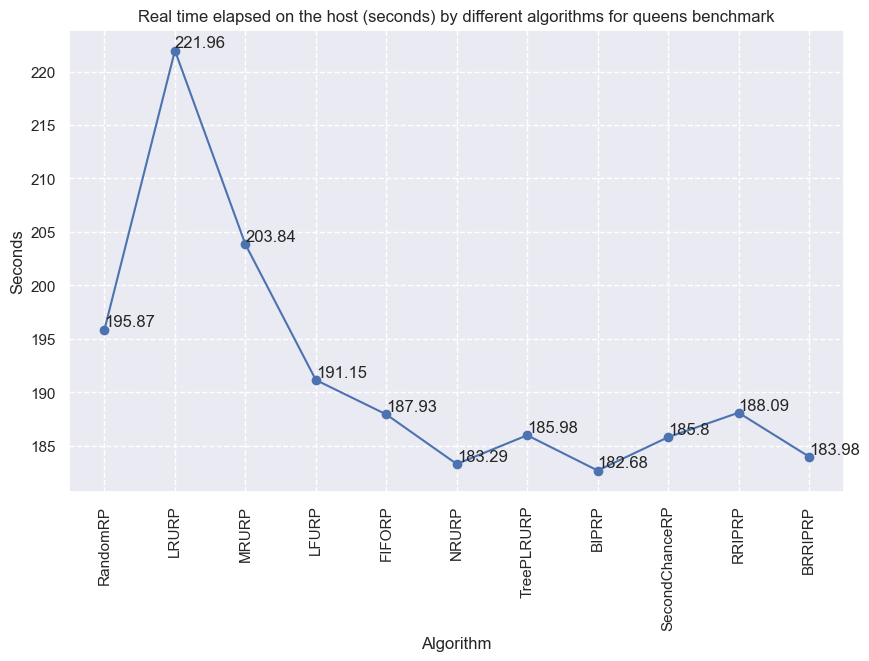

In [17]:
plot_graph(results_queens, 
           'Algorithm', 
           'hostSeconds', 
           'Algorithm', 
           'Seconds', 
           'Real time elapsed on the host (seconds) by different algorithms for queens benchmark'
          )

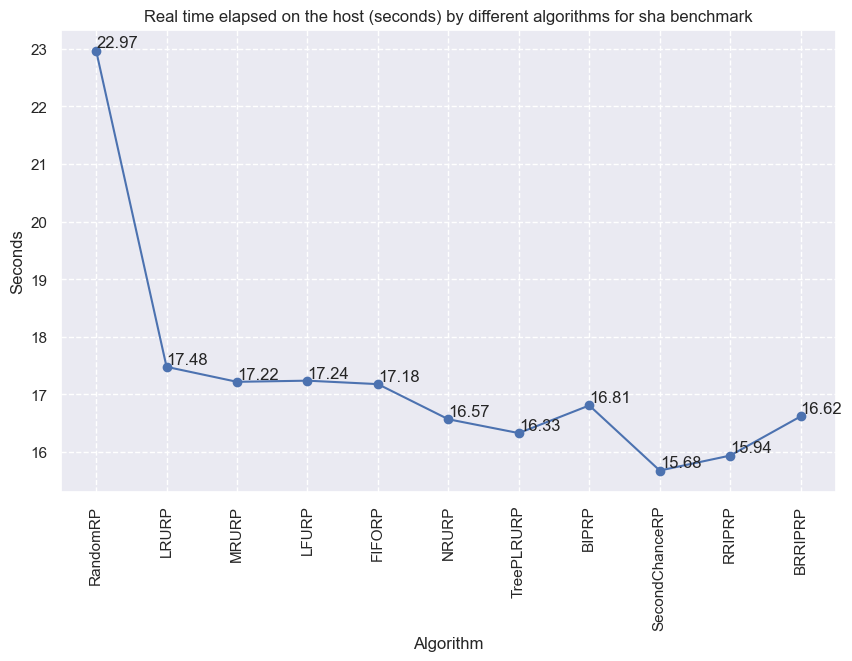

In [18]:
plot_graph(results_sha, 
           'Algorithm', 
           'hostSeconds', 
           'Algorithm', 
           'Seconds', 
           'Real time elapsed on the host (seconds) by different algorithms for sha benchmark'
          )

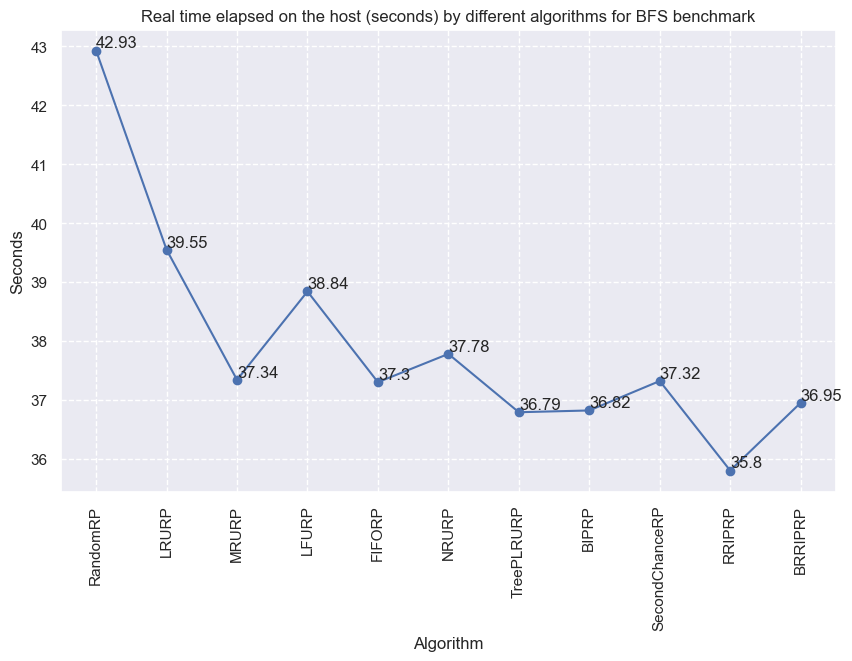

In [19]:
plot_graph(results_bfs, 
           'Algorithm', 
           'hostSeconds', 
           'Algorithm', 
           'Seconds', 
           'Real time elapsed on the host (seconds) by different algorithms for BFS benchmark'
          )

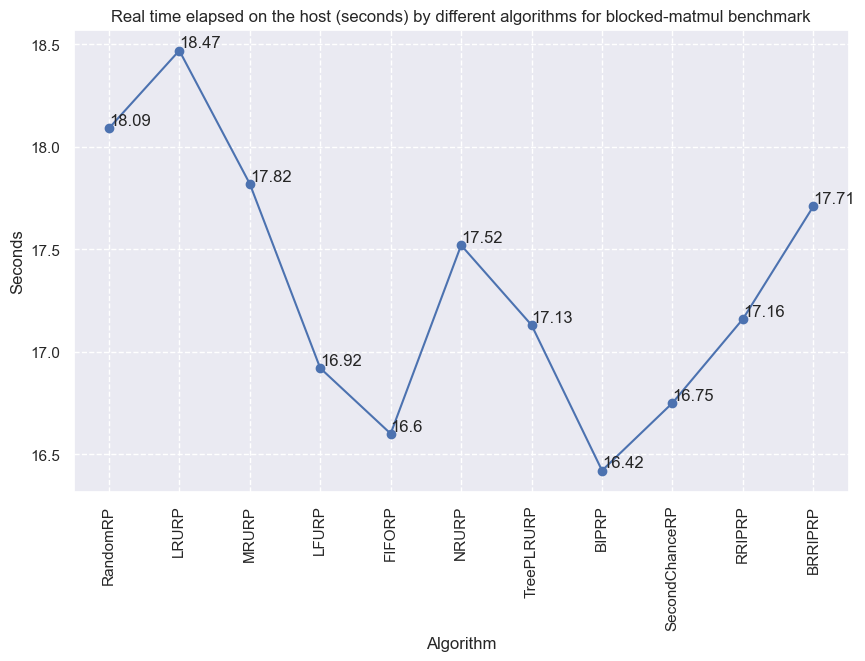

In [20]:
plot_graph(results_matmul, 
           'Algorithm', 
           'hostSeconds', 
           'Algorithm', 
           'Seconds', 
           'Real time elapsed on the host (seconds) by different algorithms for blocked-matmul benchmark'
          )

---  
__Analyzing number of ticks simulated per host second__

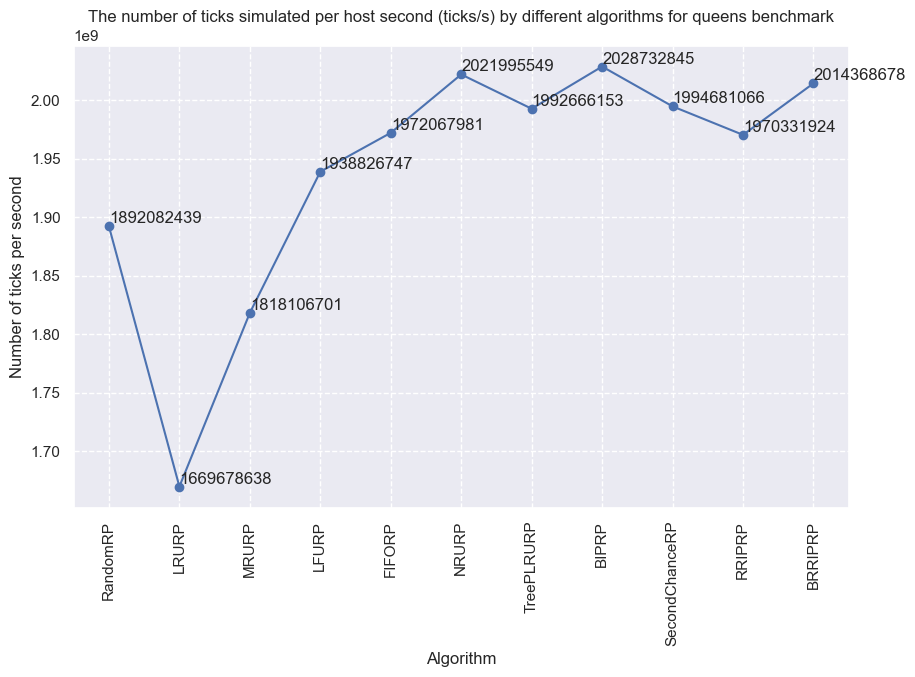

In [21]:
plot_graph(results_queens, 
           'Algorithm', 
           'hostTickRate', 
           'Algorithm', 
           'Number of ticks per second', 
           'The number of ticks simulated per host second (ticks/s) by different algorithms for queens benchmark'
          )

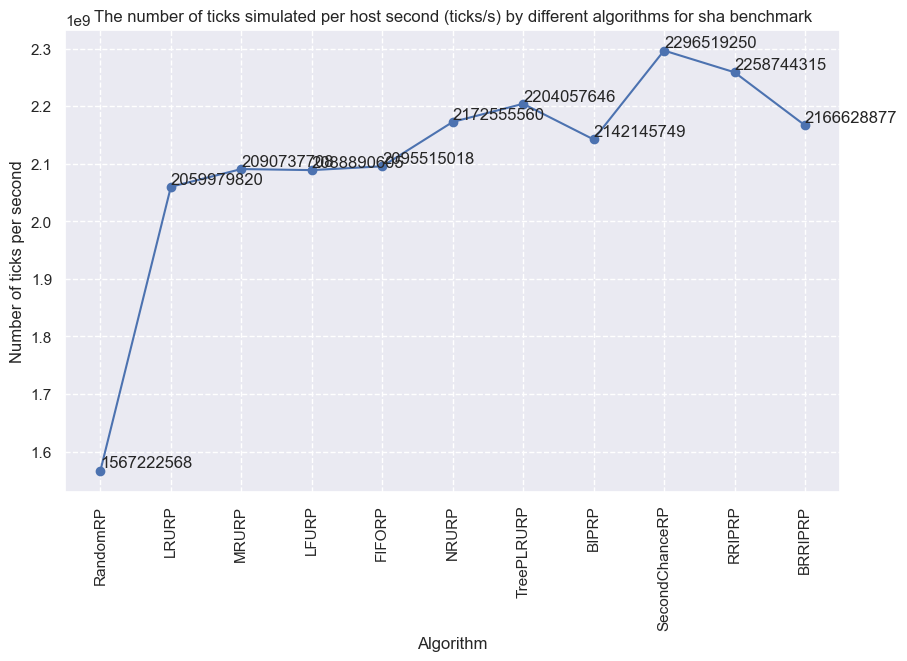

In [22]:
plot_graph(results_sha, 
           'Algorithm', 
           'hostTickRate', 
           'Algorithm', 
           'Number of ticks per second', 
           'The number of ticks simulated per host second (ticks/s) by different algorithms for sha benchmark'
          )

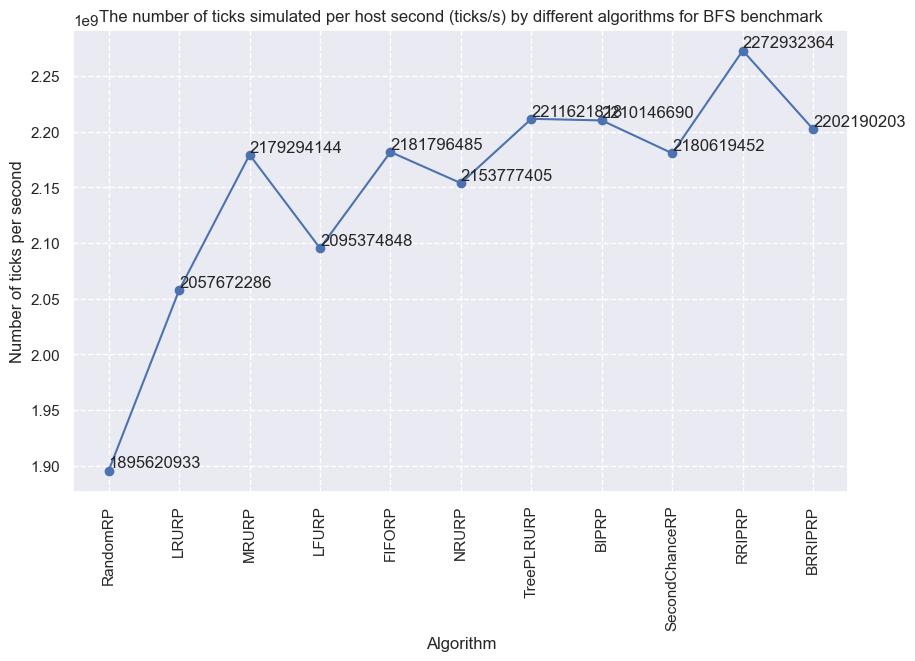

In [23]:
plot_graph(results_bfs, 
           'Algorithm', 
           'hostTickRate', 
           'Algorithm', 
           'Number of ticks per second', 
           'The number of ticks simulated per host second (ticks/s) by different algorithms for BFS benchmark'
          )

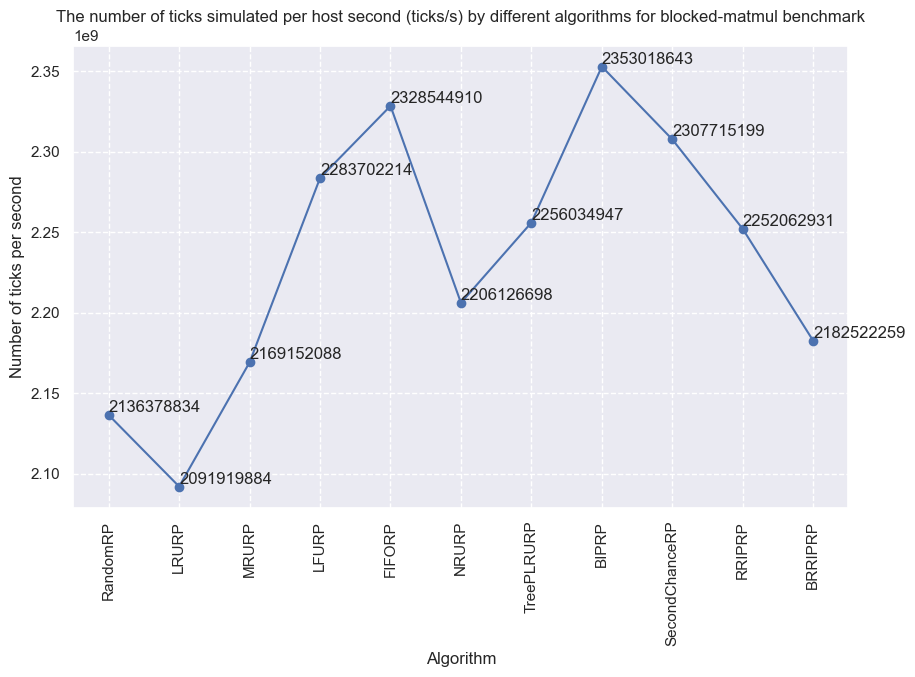

In [24]:
plot_graph(results_matmul, 
           'Algorithm', 
           'hostTickRate', 
           'Algorithm', 
           'Number of ticks per second', 
           'The number of ticks simulated per host second (ticks/s) by different algorithms for blocked-matmul benchmark'
          )

---  
__Analyzing the number of bytes of host memory used__

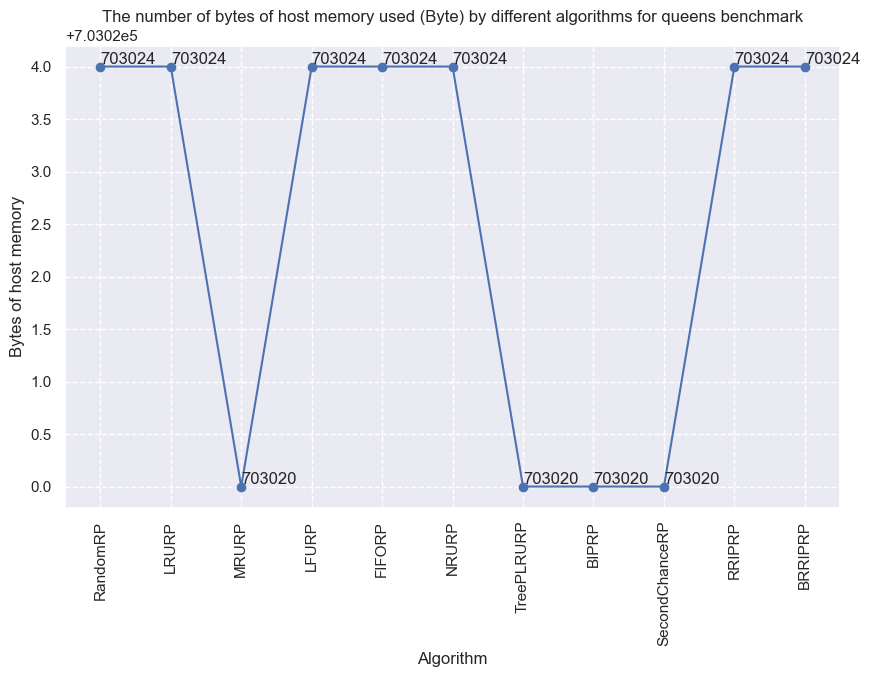

In [25]:
plot_graph(results_queens, 
           'Algorithm', 
           'hostMemory', 
           'Algorithm', 
           'Bytes of host memory', 
           'The number of bytes of host memory used (Byte) by different algorithms for queens benchmark'
          )

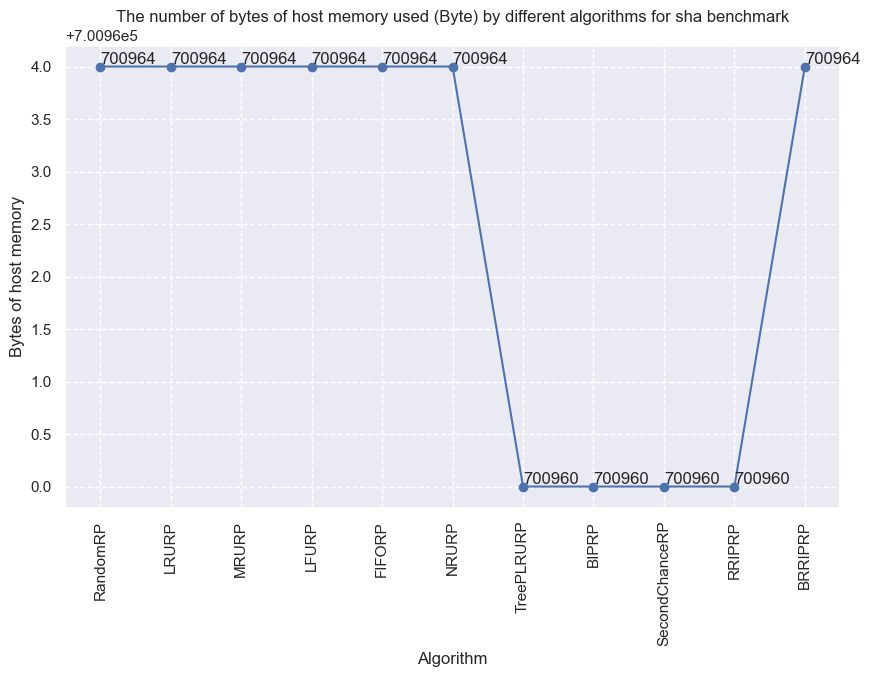

In [26]:
plot_graph(results_sha, 
           'Algorithm', 
           'hostMemory', 
           'Algorithm', 
           'Bytes of host memory', 
           'The number of bytes of host memory used (Byte) by different algorithms for sha benchmark'
          )

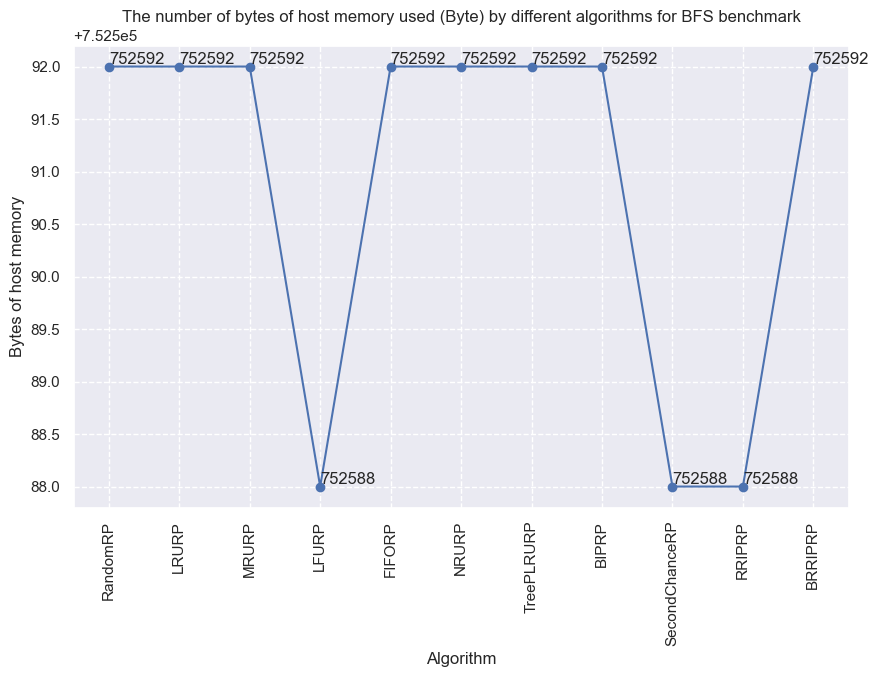

In [27]:
plot_graph(results_bfs, 
           'Algorithm', 
           'hostMemory', 
           'Algorithm', 
           'Bytes of host memory', 
           'The number of bytes of host memory used (Byte) by different algorithms for BFS benchmark'
          )

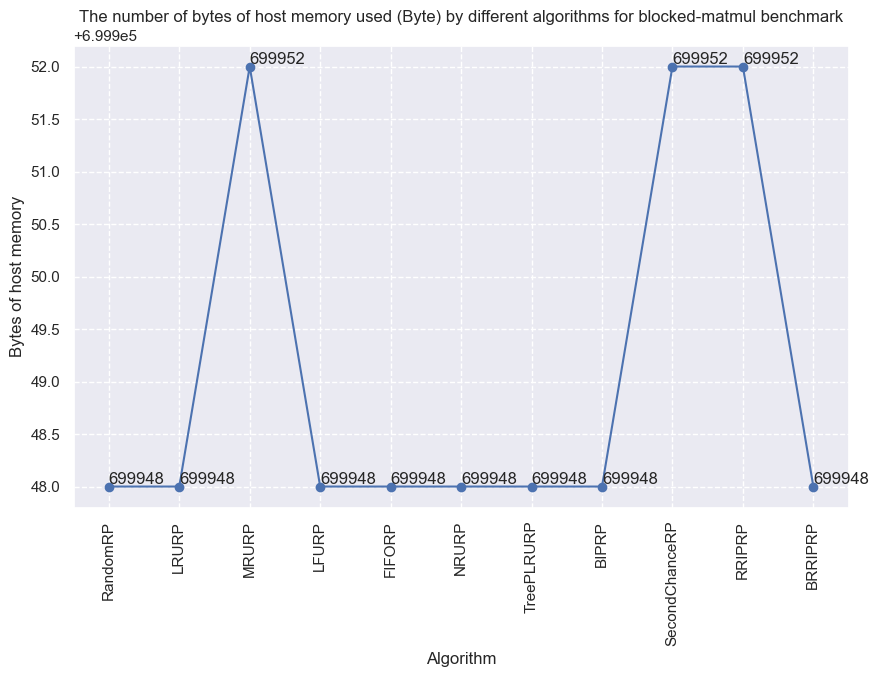

In [28]:
plot_graph(results_matmul, 
           'Algorithm', 
           'hostMemory', 
           'Algorithm', 
           'Bytes of host memory', 
           'The number of bytes of host memory used (Byte) by different algorithms for blocked-matmul benchmark'
          )

---  
__Analyzing simulator instruction rate__

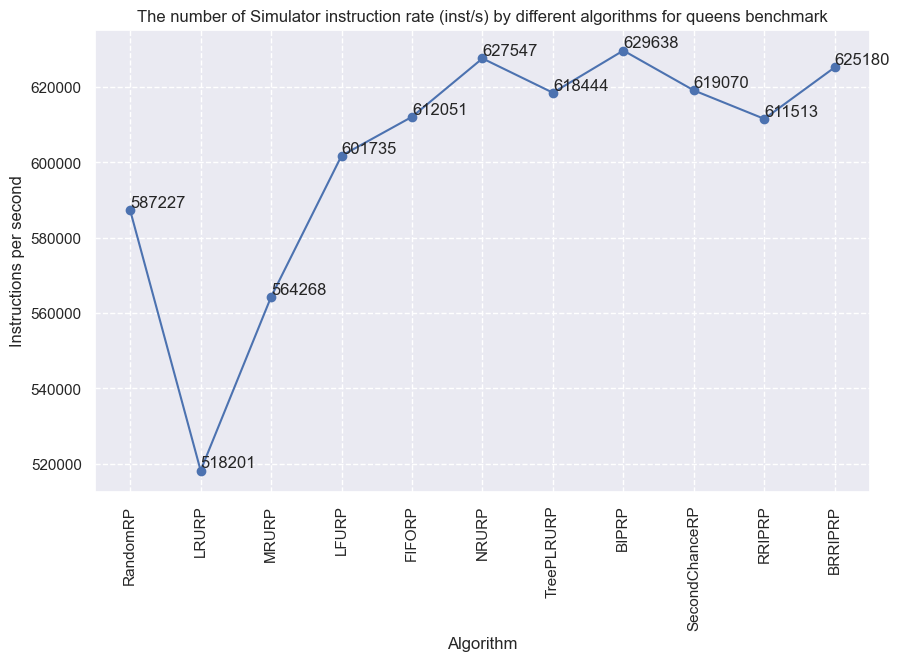

In [29]:
plot_graph(results_queens, 
           'Algorithm', 
           'hostInstRate', 
           'Algorithm', 
           'Instructions per second', 
           'The number of Simulator instruction rate (inst/s) by different algorithms for queens benchmark'
          )

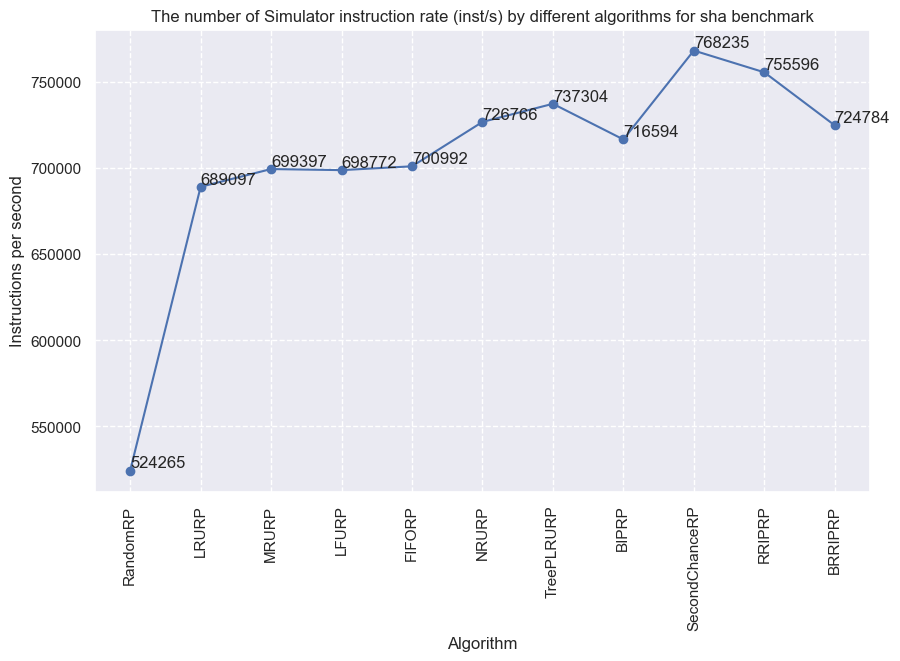

In [30]:
plot_graph(results_sha, 
           'Algorithm', 
           'hostInstRate', 
           'Algorithm', 
           'Instructions per second', 
           'The number of Simulator instruction rate (inst/s) by different algorithms for sha benchmark'
          )

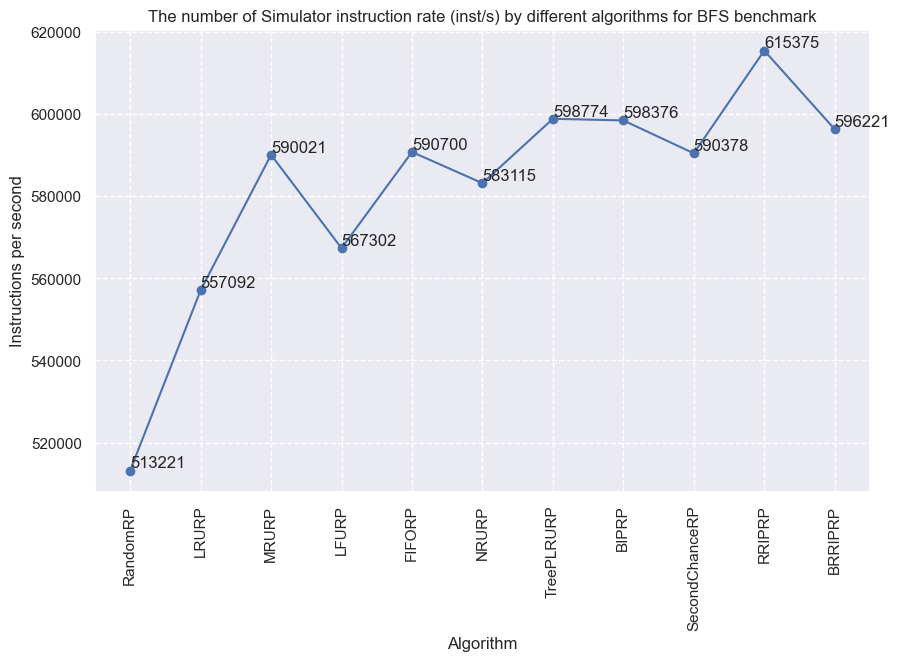

In [31]:
plot_graph(results_bfs, 
           'Algorithm', 
           'hostInstRate', 
           'Algorithm', 
           'Instructions per second', 
           'The number of Simulator instruction rate (inst/s) by different algorithms for BFS benchmark'
          )

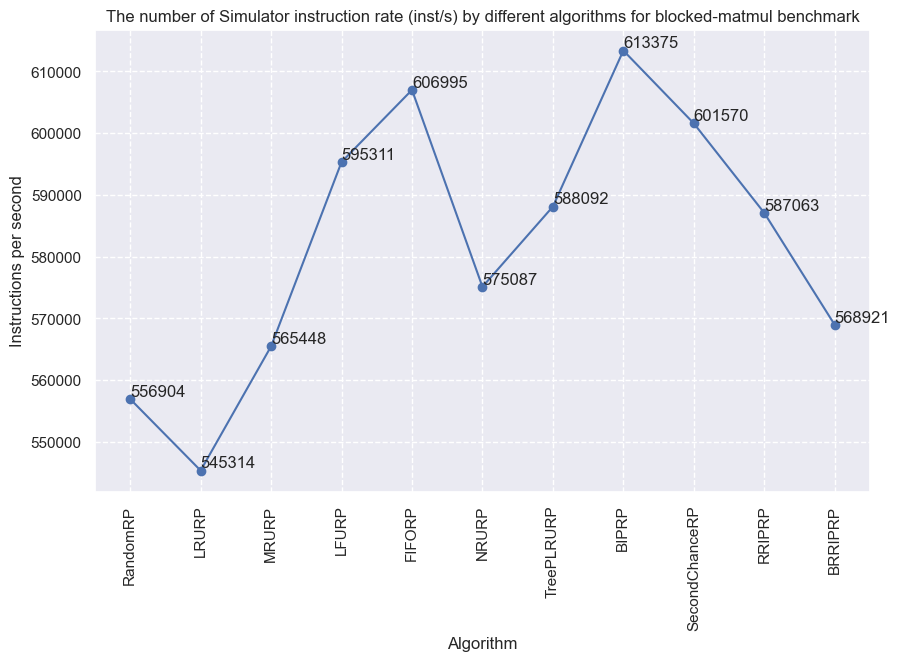

In [32]:
plot_graph(results_matmul, 
           'Algorithm', 
           'hostInstRate', 
           'Algorithm', 
           'Instructions per second', 
           'The number of Simulator instruction rate (inst/s) by different algorithms for blocked-matmul benchmark'
          )

---  
__Analyzing simulator op rate (op/s)__

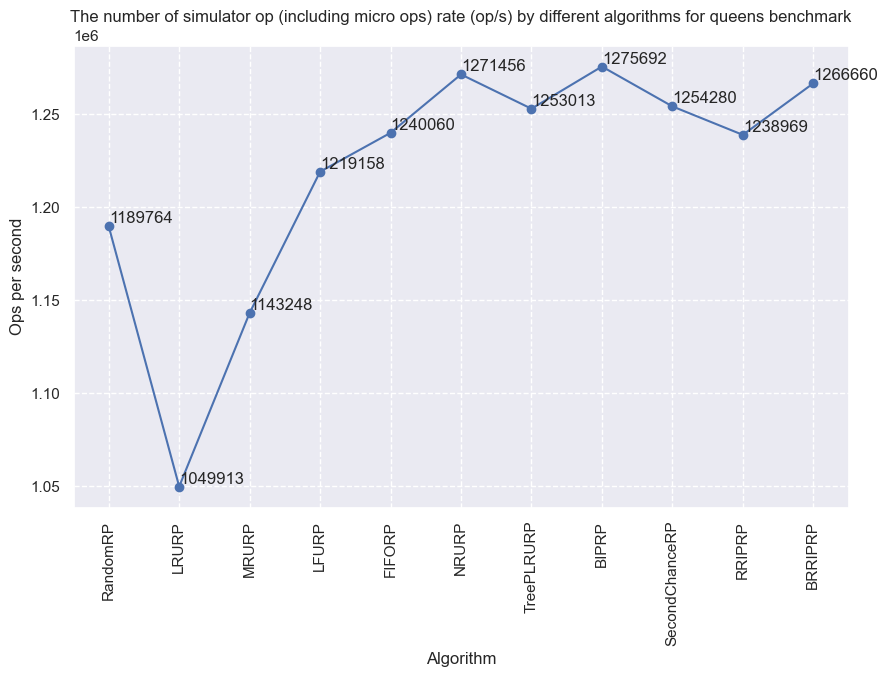

In [33]:
plot_graph(results_queens, 
           'Algorithm', 
           'hostOpRate', 
           'Algorithm', 
           'Ops per second', 
           'The number of simulator op (including micro ops) rate (op/s) by different algorithms for queens benchmark'
          )

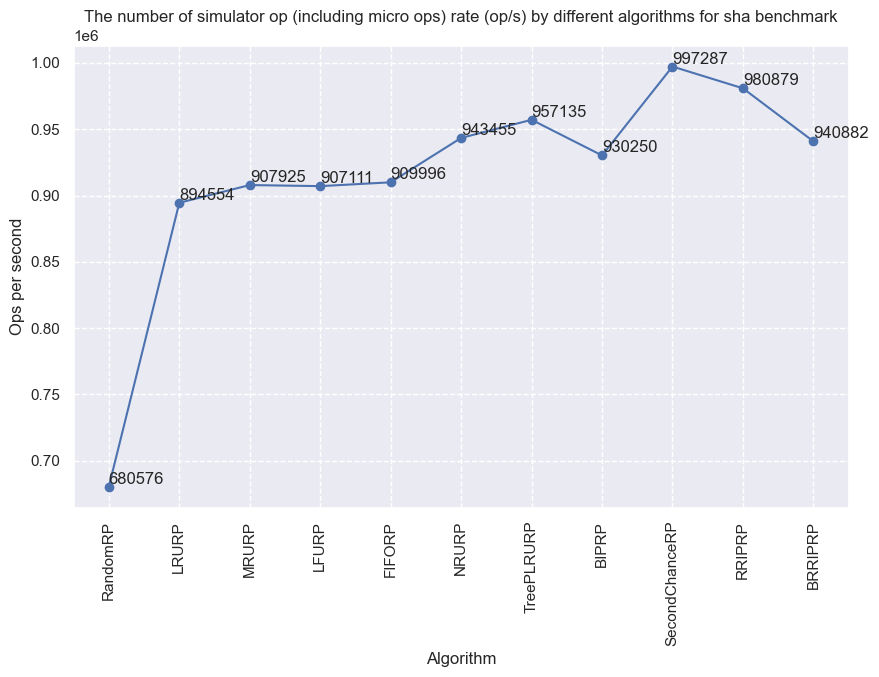

In [34]:
plot_graph(results_sha, 
           'Algorithm', 
           'hostOpRate', 
           'Algorithm', 
           'Ops per second', 
           'The number of simulator op (including micro ops) rate (op/s) by different algorithms for sha benchmark'
          )

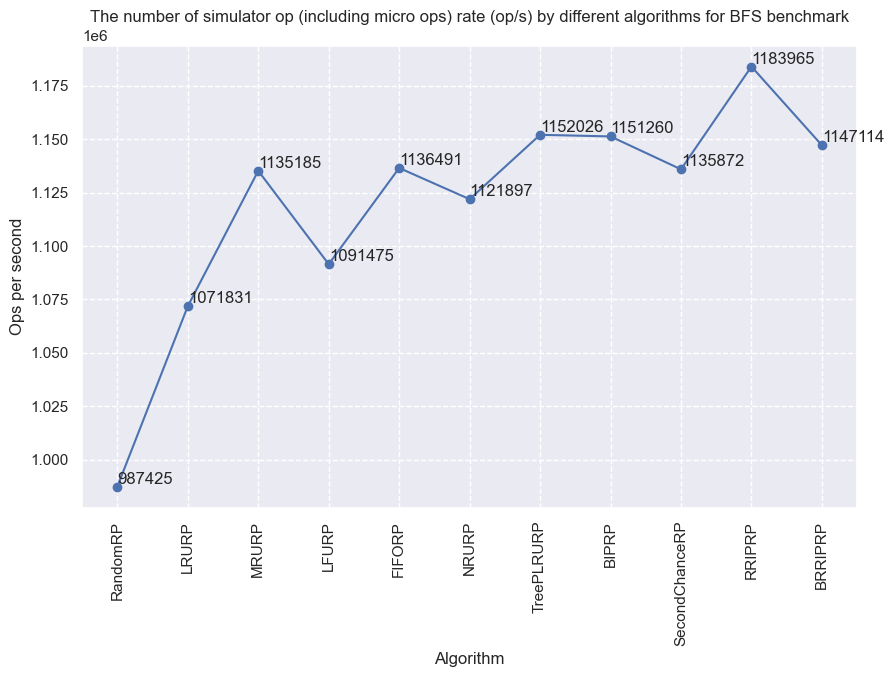

In [35]:
plot_graph(results_bfs, 
           'Algorithm', 
           'hostOpRate', 
           'Algorithm', 
           'Ops per second', 
           'The number of simulator op (including micro ops) rate (op/s) by different algorithms for BFS benchmark'
          )

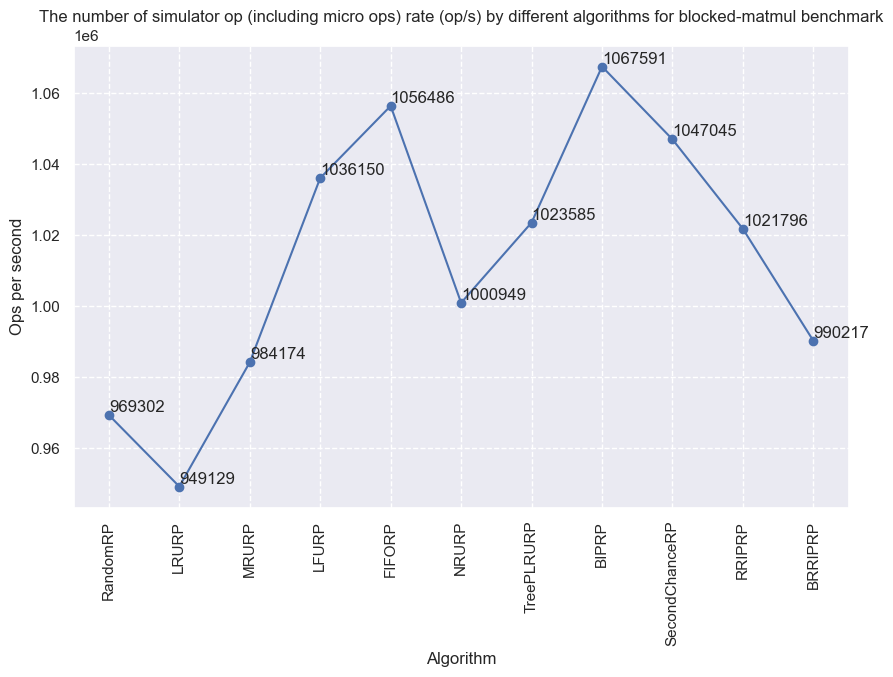

In [36]:
plot_graph(results_matmul, 
           'Algorithm', 
           'hostOpRate', 
           'Algorithm', 
           'Ops per second', 
           'The number of simulator op (including micro ops) rate (op/s) by different algorithms for blocked-matmul benchmark'
          )

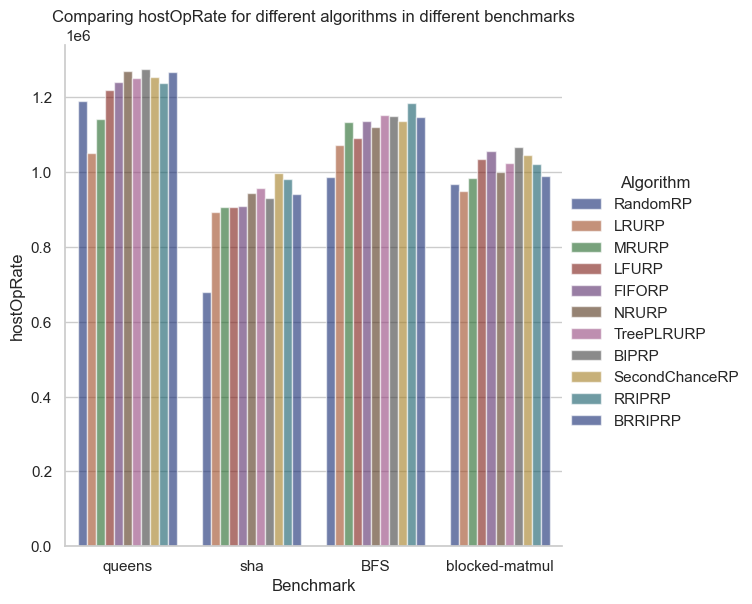

In [37]:
sns.set_theme(style='whitegrid')
sns.catplot(data=results_df[['Algorithm', 'Benchmark', 'hostOpRate']], kind='bar', x='Benchmark', y='hostOpRate', hue='Algorithm', palette="dark", alpha=.6, height=6).set(title="Comparing hostOpRate for different algorithms in different benchmarks")

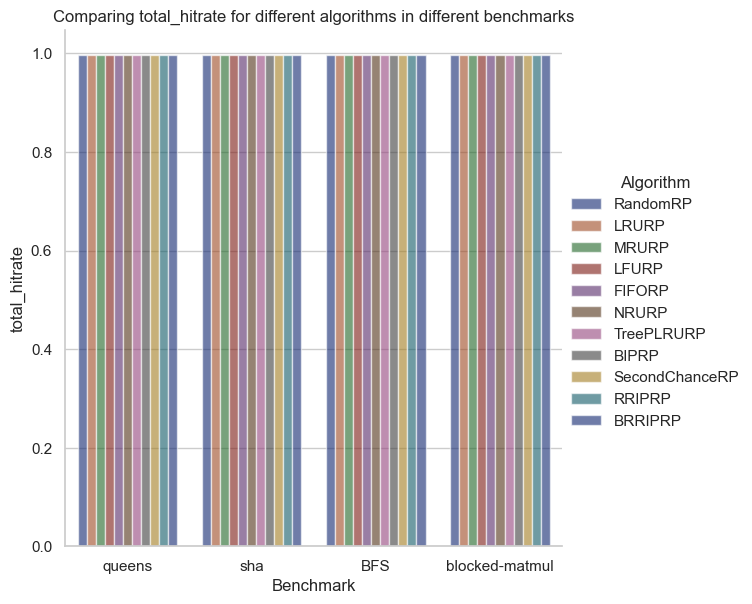

In [38]:
sns.set_theme(style='whitegrid')
sns.catplot(data=results_df[['Algorithm', 'Benchmark', 'total_hitrate']], kind='bar', x='Benchmark', y='total_hitrate', hue='Algorithm', palette="dark", alpha=.6, height=6).set(title="Comparing total_hitrate for different algorithms in different benchmarks")

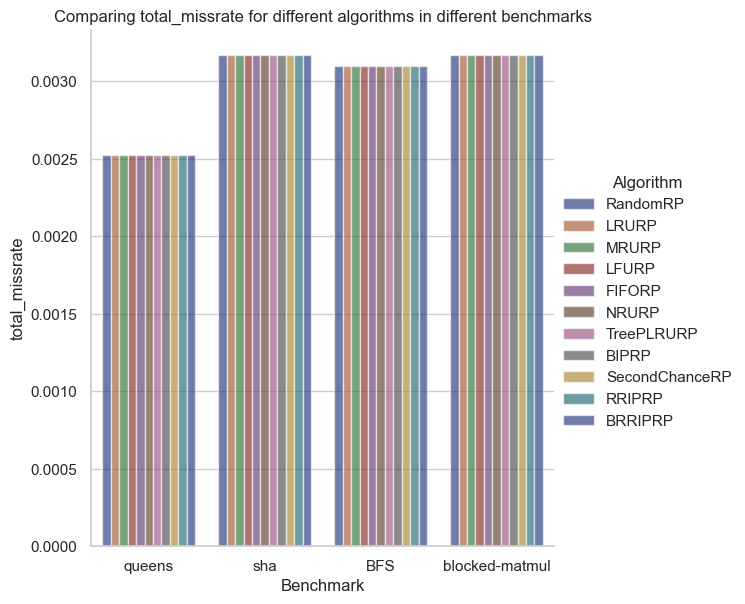

In [39]:
sns.set_theme(style='whitegrid')
sns.catplot(data=results_df[['Algorithm', 'Benchmark', 'total_missrate']], kind='bar', x='Benchmark', y='total_missrate', hue='Algorithm', palette="dark", alpha=.6, height=6).set(title="Comparing total_missrate for different algorithms in different benchmarks")